In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("lab3_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Missing values

def missing_values_table(df):
    missing_value = df.isnull().sum()
    missing_value_percentage = 100 * df.isnull().sum() / len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percentage], axis=1)
    missing_value_table = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total Values',ascending=False).round(1)
    return missing_value_table

missing_values_table(data)

,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [5]:
# all null Age values now mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
cols = ["Age"]
data[cols] = imputer.fit_transform(data[cols])
# 2 null Embarked rows are deleted
data = data[~data["Embarked"].isna()]

In [6]:
# Cabin because of lots of null values, Name and Ticket because of uniqueness, which doesn't play any role
drop_cols = ["Cabin", "Ticket", "Name", "PassengerId"]
passangers = data.drop(drop_cols, axis=1)

In [7]:
# Encode
encode_cols = ["Pclass", "Sex", "Embarked"]
passangers = pd.get_dummies(passangers, columns=encode_cols)

In [8]:
X = passangers
passangers.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


c:\users\wykyee\pycharmprojects\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


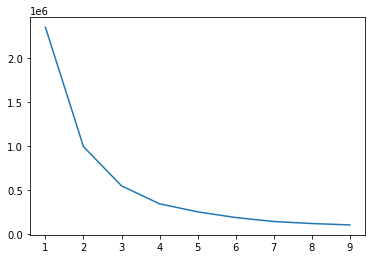

In [9]:
inert = []
for i in range(1, 10):
    # inertia_ is sum of squared distances of samples to their closest cluster center.
    inert.append(KMeans(n_clusters=i).fit(X).inertia_)

_ = sns.lineplot(range(1,10), inert)

<ipython-input-10-74867d003651>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = clusters


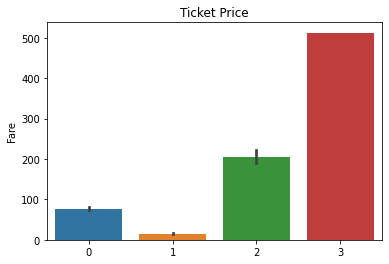

In [10]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(X)
data['clusters'] = clusters
_ = sns.barplot(x=clusters, y=data["Fare"]).set_title('Ticket Price')

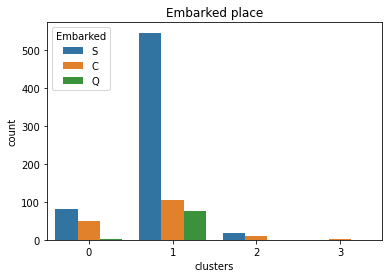

In [11]:
_ = sns.countplot(data=data, x='clusters', hue="Embarked").set_title('Embarked place')

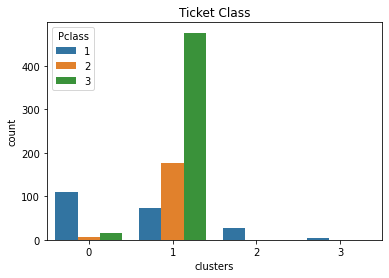

In [12]:
_ = sns.countplot(data=data, x='clusters', hue='Pclass').set_title('Ticket Class')

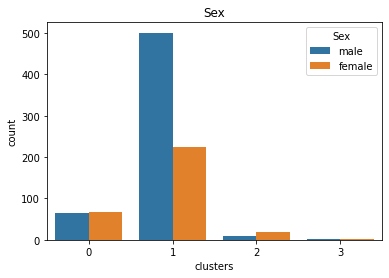

In [13]:
_ = sns.countplot(data=data, x='clusters', hue='Sex').set_title('Sex')

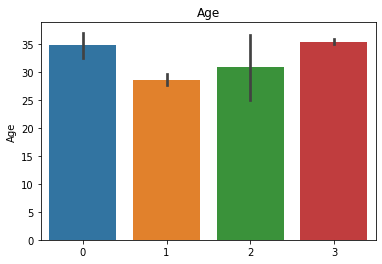

In [14]:
_ = sns.barplot(x=clusters, y=data["Age"]).set_title('Age')

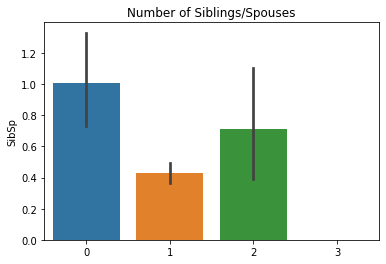

In [15]:
_ = sns.barplot(x=clusters, y=data["SibSp"]).set_title('Number of Siblings/Spouses')

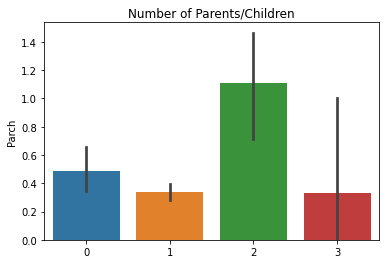

In [16]:
_ = sns.barplot(x=clusters, y=data["Parch"]).set_title('Number of Parents/Children')

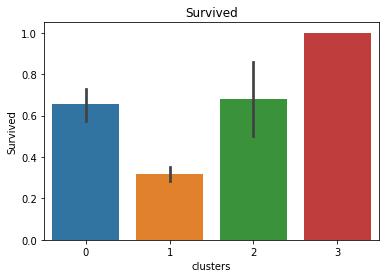

In [17]:
sns.barplot(x=data["clusters"], y=data["Survived"]).set_title('Survived');

In [18]:
data["clusters"].value_counts()

1    725
0    133
2     28
3      3
Name: clusters, dtype: int64

In [20]:
data[data["clusters"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3


# Conclusion

### Cluster 0

- most bought lowest price 1st class tickets
- 65% survived
- embarked either in Southhampton or in Cherbourg
- everyone has at least 1 family member on board

### Cluster 1

- most men
- with 3d class ticket 
- embarked in Southampton 
- with lowest ticket's price
- most likely didn't survive

### Cluster 2

- most have bought very expensive 1st class tickets(probably in the last moment)
- everyone has at least 1 family member on board
- 65% to survive

### Cluster 3

- 100% of survivers
- the most expansive ticket's price
- embarked in Cherbourg
- noone has siblings

To sum up: if person is embarked in Southhampton or Queenstown, he' most likely to have the cheapest ticket from 3d class, he's man with 50% to have family member on the board and has only 30% to survive. Most chances to get survived have people from 1st class with expensive tickets and it doesn't depend on gender and number of family members on board, ~ 65% to survive. But if you've bought the most expensive tickets and have embarked in Cherbourg you will have almost 100% chance to survive.